In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [3]:
df = pd.read_csv('health_consultations.csv')

In [4]:
df

,Booking_ID,Patient_Name,Consultation_Date,Doctor_Specialty,Consultation_Fee,Duration_Min,Rating,Booking_Platform,Is_Followup,Payment_Status
0,BKG2000,Shannon Rodriguez,2024-11-11,ENT,574.51,40.0,4.0,Phone,1,Pending
1,BKG2001,Christopher Bush,2023-09-08,Cardiologist,479.26,69.0,4.0,App,1,Pending
2,BKG2002,Emily Mosley,2023-12-18,Cardiologist,597.15,69.0,4.0,Walk-in,0,Refunded
3,BKG2003,Adam Lawrence,2024-02-27,ENT,NaN,28.0,3.0,Phone,1,Refunded
4,BKG2004,Jessica Lester,2023-08-14,General Physician,464.88,58.0,2.0,Website,1,Pending
...,...,...,...,...,...,...,...,...,...,...
1510,BKG2152,Brandon Mendoza,2023-08-01,Psychiatrist,398.0,47.0,4.0,Walk-in,0,Paid
1511,BKG2931,Tyler Salazar,2024-06-02,General Physician,782.17,30.0,2.0,Walk-in,0,Paid
1512,BKG2886,Rachel Hogan,2023-11-21,General Physician,587.59,20.0,3.0,Website,1,Paid
1513,BKG2668,James Alexander,2023-09-09,Orthopedic,102.35,56.0,NaN,Phone,1,Unpaid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Booking_ID         1515 non-null   object 
 1   Patient_Name       1515 non-null   object 
 2   Consultation_Date  1515 non-null   object 
 3   Doctor_Specialty   1515 non-null   object 
 4   Consultation_Fee   1485 non-null   object 
 5   Duration_Min       1485 non-null   object 
 6   Rating             1488 non-null   float64
 7   Booking_Platform   1515 non-null   object 
 8   Is_Followup        1515 non-null   int64  
 9   Payment_Status     1515 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 118.5+ KB


_Missing Values_

In [6]:
df.isna().sum()

Booking_ID            0
Patient_Name          0
Consultation_Date     0
Doctor_Specialty      0
Consultation_Fee     30
Duration_Min         30
Rating               27
Booking_Platform      0
Is_Followup           0
Payment_Status        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Booking_ID           0
Patient_Name         0
Consultation_Date    0
Doctor_Specialty     0
Consultation_Fee     0
Duration_Min         0
Rating               0
Booking_Platform     0
Is_Followup          0
Payment_Status       0
dtype: int64

In [9]:
df.shape

(1429, 10)

In [10]:
df.head()

,Booking_ID,Patient_Name,Consultation_Date,Doctor_Specialty,Consultation_Fee,Duration_Min,Rating,Booking_Platform,Is_Followup,Payment_Status
0,BKG2000,Shannon Rodriguez,2024-11-11,ENT,574.51,40.0,4.0,Phone,1,Pending
1,BKG2001,Christopher Bush,2023-09-08,Cardiologist,479.26,69.0,4.0,App,1,Pending
2,BKG2002,Emily Mosley,2023-12-18,Cardiologist,597.15,69.0,4.0,Walk-in,0,Refunded
4,BKG2004,Jessica Lester,2023-08-14,General Physician,464.88,58.0,2.0,Website,1,Pending
5,BKG2005,Mr. Mark Edwards,2024-05-23,Dermatologist,464.88,72.0,3.0,App,0,Paid


_Type Conversion_

In [11]:
df.dtypes

Booking_ID            object
Patient_Name          object
Consultation_Date     object
Doctor_Specialty      object
Consultation_Fee      object
Duration_Min          object
Rating               float64
Booking_Platform      object
Is_Followup            int64
Payment_Status        object
dtype: object

In [13]:
df['Consultation_Fee']=df['Consultation_Fee'].astype(float)

In [12]:
df['Consultation_Fee']=df['Consultation_Fee'].str.replace('Five Hundred','500')

In [16]:
df['Duration_Min']=df['Duration_Min'].astype(float)

In [15]:
df['Duration_Min']=df['Duration_Min'].str.replace('Ninety','90.0')

_Duplicates removal_

In [17]:
df.duplicated().sum()

np.int64(14)

In [18]:
df.drop_duplicates(inplace=True)

1. What is the shape of the dataset?

In [19]:
df.shape

(1415, 10)


2. What are the names and data types of the columns?

In [20]:
df.dtypes

Booking_ID            object
Patient_Name          object
Consultation_Date     object
Doctor_Specialty      object
Consultation_Fee     float64
Duration_Min         float64
Rating               float64
Booking_Platform      object
Is_Followup            int64
Payment_Status        object
dtype: object

3. Display the first 5 and last 5 rows of the dataset.

In [21]:
df

,Booking_ID,Patient_Name,Consultation_Date,Doctor_Specialty,Consultation_Fee,Duration_Min,Rating,Booking_Platform,Is_Followup,Payment_Status
0,BKG2000,Shannon Rodriguez,2024-11-11,ENT,574.51,40.0,4.0,Phone,1,Pending
1,BKG2001,Christopher Bush,2023-09-08,Cardiologist,479.26,69.0,4.0,App,1,Pending
2,BKG2002,Emily Mosley,2023-12-18,Cardiologist,597.15,69.0,4.0,Walk-in,0,Refunded
4,BKG2004,Jessica Lester,2023-08-14,General Physician,464.88,58.0,2.0,Website,1,Pending
5,BKG2005,Mr. Mark Edwards,2024-05-23,Dermatologist,464.88,72.0,3.0,App,0,Paid
...,...,...,...,...,...,...,...,...,...,...
1495,BKG3495,Jennifer Soto,2025-06-13,General Physician,800.91,68.0,2.0,Walk-in,0,Pending
1496,BKG3496,Kevin Hernandez,2024-10-11,Cardiologist,809.23,72.0,3.0,Walk-in,0,Pending
1497,BKG3497,Jodi Coleman,2024-06-06,ENT,681.25,86.0,4.0,App,1,Refunded
1498,BKG3498,Jason Brady,2024-09-27,General Physician,653.61,55.0,4.0,App,1,Unpaid


4. Are there any missing values? If so, which columns and how many?

In [22]:
df.isna().sum()

Booking_ID           0
Patient_Name         0
Consultation_Date    0
Doctor_Specialty     0
Consultation_Fee     0
Duration_Min         0
Rating               0
Booking_Platform     0
Is_Followup          0
Payment_Status       0
dtype: int64

5. Are there any duplicate rows?

In [23]:
df=df.drop_duplicates()

In [24]:
df.shape

(1415, 10)

6. How many unique specialties of doctors are there?

In [26]:
df['Doctor_Specialty'].nunique()

6


7. Are there any invalid or inconsistent data types?

In [27]:
df.dtypes

Booking_ID            object
Patient_Name          object
Consultation_Date     object
Doctor_Specialty      object
Consultation_Fee     float64
Duration_Min         float64
Rating               float64
Booking_Platform      object
Is_Followup            int64
Payment_Status        object
dtype: object

8. Convert the Consultation_Date column to proper datetime format. Are there any errors?


In [29]:
df['Consultation_Date'] = df['Consultation_Date'].astype('datetime64[ns]')

In [28]:
df.loc[10, 'Consultation_Date'] = '2023-12-31'

9. Identify and remove or fix rows with incorrect data in Consultation_Fee and Duration_Min.


10. Handle missing values using appropriate imputation strategies.


In [30]:
df.head()

,Booking_ID,Patient_Name,Consultation_Date,Doctor_Specialty,Consultation_Fee,Duration_Min,Rating,Booking_Platform,Is_Followup,Payment_Status
0,BKG2000,Shannon Rodriguez,2024-11-11,ENT,574.51,40.0,4.0,Phone,1,Pending
1,BKG2001,Christopher Bush,2023-09-08,Cardiologist,479.26,69.0,4.0,App,1,Pending
2,BKG2002,Emily Mosley,2023-12-18,Cardiologist,597.15,69.0,4.0,Walk-in,0,Refunded
4,BKG2004,Jessica Lester,2023-08-14,General Physician,464.88,58.0,2.0,Website,1,Pending
5,BKG2005,Mr. Mark Edwards,2024-05-23,Dermatologist,464.88,72.0,3.0,App,0,Paid


11. Remove or cap outliers in Consultation_Fee and Duration_Min.


<function matplotlib.pyplot.show(close=None, block=None)>

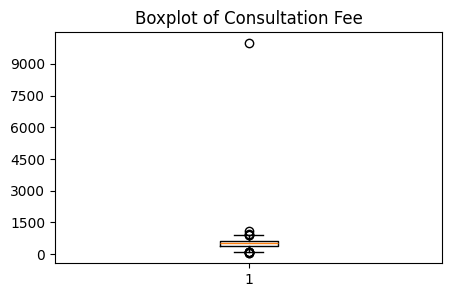

In [31]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['Consultation_Fee'])
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune="both"))
plt.title('Boxplot of Consultation Fee')
plt.show

In [33]:
Q1 = df["Consultation_Fee"].quantile(0.25)
Q3 = df["Consultation_Fee"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
outliers = df[df["Consultation_Fee"] > upper_limit]
df = df[df["Consultation_Fee"] <= upper_limit]

<function matplotlib.pyplot.show(close=None, block=None)>

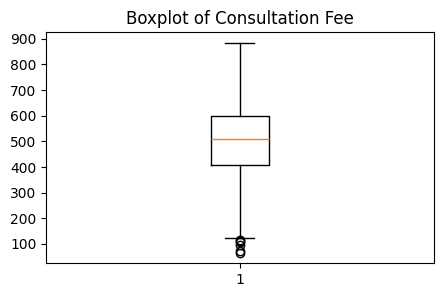

In [34]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['Consultation_Fee'])
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune="both"))
plt.title('Boxplot of Consultation Fee')
plt.show

In [35]:
outliers

,Booking_ID,Patient_Name,Consultation_Date,Doctor_Specialty,Consultation_Fee,Duration_Min,Rating,Booking_Platform,Is_Followup,Payment_Status
1233,BKG3233,Melissa Khan,2023-07-07,Psychiatrist,886.96,63.0,2.0,Website,0,Refunded


13. What is the distribution of Doctor_Specialty?


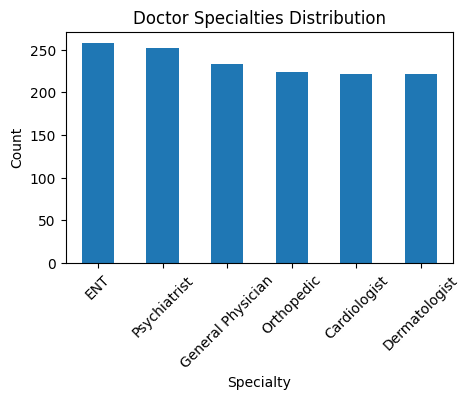

In [36]:
plt.figure(figsize=(5,3))
df["Doctor_Specialty"].value_counts().plot(kind="bar")
plt.title("Doctor Specialties Distribution")
plt.xlabel("Specialty")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

14. What is the range of Consultation_Fee?


In [37]:
fee_range = df["Consultation_Fee"].max() - df["Consultation_Fee"].min()
fee_range

np.float64(818.45)

15. What is the average Duration_Min of consultations?

In [38]:
average_duration=df['Duration_Min'].mean()
average_duration

np.float64(49.65294535131299)

16. What is the count of each Booking_Platform used?


In [39]:
count_bookingplat= df['Booking_Platform'].value_counts()
count_bookingplat

Booking_Platform
Walk-in    378
Phone      360
Website    339
App        332
Name: count, dtype: int64


17. What percentage of bookings were follow-ups?


In [40]:
follow_up_pct= df['Is_Followup'].mean()*100
follow_up_pct

np.float64(51.029098651525906)

18. What is the average consultation fee per Doctor_Specialty?


In [41]:
df.groupby('Doctor_Specialty')['Consultation_Fee'].mean().sort_values(ascending=False)

Doctor_Specialty
Dermatologist        524.193620
General Physician    512.761416
ENT                  503.863372
Psychiatrist         501.322143
Orthopedic           498.942009
Cardiologist         498.365520
Name: Consultation_Fee, dtype: float64

19. How does Duration_Min vary by Booking_Platform?


In [44]:
df.groupby("Booking_Platform")["Duration_Min"].mean().sort_values(ascending=False)

Booking_Platform
Phone      50.141667
Walk-in    49.571429
App        49.442771
Website    49.430678
Name: Duration_Min, dtype: float64


20. What is the relationship between Rating and Consultation_Fee?


In [45]:
correlation = df["Rating"].corr(df["Consultation_Fee"])
print(f"Correlation: {correlation:.2f}") # 0.04 little to no linear relation

Correlation: 0.04


21. Compare average fees for follow-up vs. first-time consultations.


In [46]:
df.groupby("Is_Followup")["Consultation_Fee"].agg(["count", "mean"]).rename(index={False: "First-time", True: "Follow-up"})

,count,mean
Is_Followup,,
First-time,690,506.109826
Follow-up,719,506.726203


22. Is there a trend in consultation fee or duration over months?


In [54]:
df['Consultation_Fee'].groupby(df['Consultation_Date'].dt.month).mean()

Consultation_Date
1     510.424167
2     503.782162
3     517.090374
4     499.578018
5     514.670885
6     487.651481
7     510.532627
8     522.011232
9     507.912308
10    510.745950
11    468.736723
12    521.117434
Name: Consultation_Fee, dtype: float64

<Axes: xlabel='Consultation_Date'>

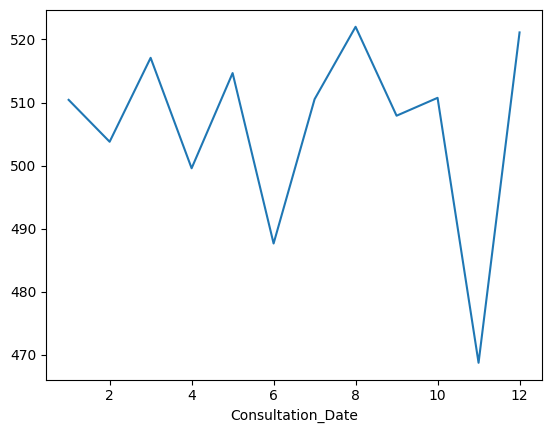

In [56]:
df['Consultation_Fee'].groupby(df['Consultation_Date'].dt.month).mean().plot()

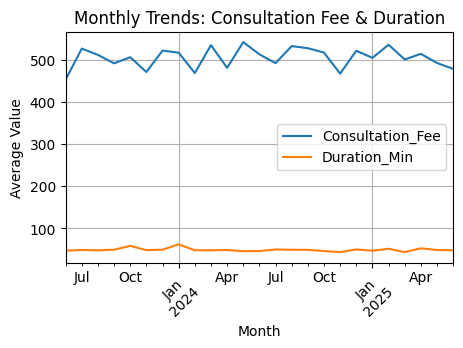

In [49]:
monthly_stats.plot(figsize=(5, 3))
plt.title("Monthly Trends: Consultation Fee & Duration")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



23. What is the average rating per doctor specialty?


In [50]:
df['Rating'].mean()

np.float64(3.1788502484031227)

In [52]:
df

,Booking_ID,Patient_Name,Consultation_Date,Doctor_Specialty,Consultation_Fee,Duration_Min,Rating,Booking_Platform,Is_Followup,Payment_Status,Consultation_Month
0,BKG2000,Shannon Rodriguez,2024-11-11,ENT,574.51,40.0,4.0,Phone,1,Pending,2024-11
1,BKG2001,Christopher Bush,2023-09-08,Cardiologist,479.26,69.0,4.0,App,1,Pending,2023-09
2,BKG2002,Emily Mosley,2023-12-18,Cardiologist,597.15,69.0,4.0,Walk-in,0,Refunded,2023-12
4,BKG2004,Jessica Lester,2023-08-14,General Physician,464.88,58.0,2.0,Website,1,Pending,2023-08
5,BKG2005,Mr. Mark Edwards,2024-05-23,Dermatologist,464.88,72.0,3.0,App,0,Paid,2024-05
...,...,...,...,...,...,...,...,...,...,...,...
1495,BKG3495,Jennifer Soto,2025-06-13,General Physician,800.91,68.0,2.0,Walk-in,0,Pending,2025-06
1496,BKG3496,Kevin Hernandez,2024-10-11,Cardiologist,809.23,72.0,3.0,Walk-in,0,Pending,2024-10
1497,BKG3497,Jodi Coleman,2024-06-06,ENT,681.25,86.0,4.0,App,1,Refunded,2024-06
1498,BKG3498,Jason Brady,2024-09-27,General Physician,653.61,55.0,4.0,App,1,Unpaid,2024-09
